In [96]:
import numpy as np
from matplotlib import animation
from matplotlib import pyplot as plt
plt.rcParams['axes.facecolor'] = 'midnightblue'
%matplotlib inline
from IPython.display import HTML as display


In [97]:
boid_count = 40
limits = np.array([2000, 2000])
positions = np.random.rand(2, boid_count) * limits[:, np.newaxis]


In [102]:
def new_flock(count, lower_limits, upper_limits):
    width = upper_limits - lower_limits
    return (lower_limits[:, np.newaxis] + np.random.rand(2, count) * width[:, np.newaxis])
def update_boids(positions, velocities):
    move_to_middle_strength = 0.01
    middle = np.mean(positions, 1)
    direction_to_middle = positions - middle[:, np.newaxis]
    velocities -= direction_to_middle * move_to_middle_strength

    separations = positions[:, np.newaxis, :] - positions[:, :, np.newaxis]
    squared_displacements = separations * separations
    square_distances = np.sum(squared_displacements, 0)
    alert_distance = 100
    far_away = square_distances > alert_distance
    separations_if_close = np.copy(separations)
    separations_if_close[0, :, :][far_away] = 0
    separations_if_close[1, :, :][far_away] = 0
    velocities += np.sum(separations_if_close, 1)

    positions += velocities
def animate(frame):
    update_boids(positions, velocities)
    scatter.set_offsets(positions.transpose())

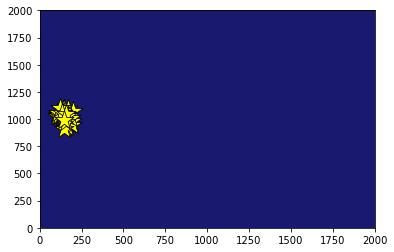

In [103]:
positions = new_flock(boid_count, np.array([100, 900]), np.array([200, 1100]))
velocities = new_flock(boid_count, np.array([0, -20]), np.array([10, 20]))


figure = plt.figure()
axes = plt.axes(xlim=(0, limits[0]), ylim=(0, limits[1]))
scatter = axes.scatter(positions[0, :], positions[1, :],
                       marker='*', s=400, edgecolor='k', color='yellow', lw=0.8)

In [104]:
anim = animation.FuncAnimation(figure, animate,frames=200, interval=50)
display(anim.to_jshtml())